Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# CS110 Pre-class Work 14.1

In this Pre-class work we will apply Huffman's algorithm in file compression. 
## Question 1.
Below is the utility function for downloading a text file from a URL. 

In [4]:
from urllib.request import urlopen
import shutil
import gzip
import os


# Download the file if need be:
def download_file(url, filename):
    if not os.path.exists(filename):
        response = urlopen(url + filename)
        shutil.copyfileobj(
            gzip.GzipFile(fileobj=response), open(filename+'.txt', 'wb'))

url = "http://www.gutenberg.org/ebooks/"
filename = "100.txt.utf-8"

download_file(url, filename) 

OSError: Not a gzipped file (b'<!')

Your tasks:

1. Run the cell so that the file "100.txt.utf-8" is downloaded to your local machine. Please allow some time for the code to complete.
2. Check that the file "100.txt.utf-8" has been downloaded to your computer.
3. Open and view the file with your favorite text editor. 
4. In the cell below, write down the size of the downloaded file (for example, 1.2GB)

I tried a few times and wait but the code does not run.

I followed the link given in the code to download the file manually and it said that the link is blocked in Germany.


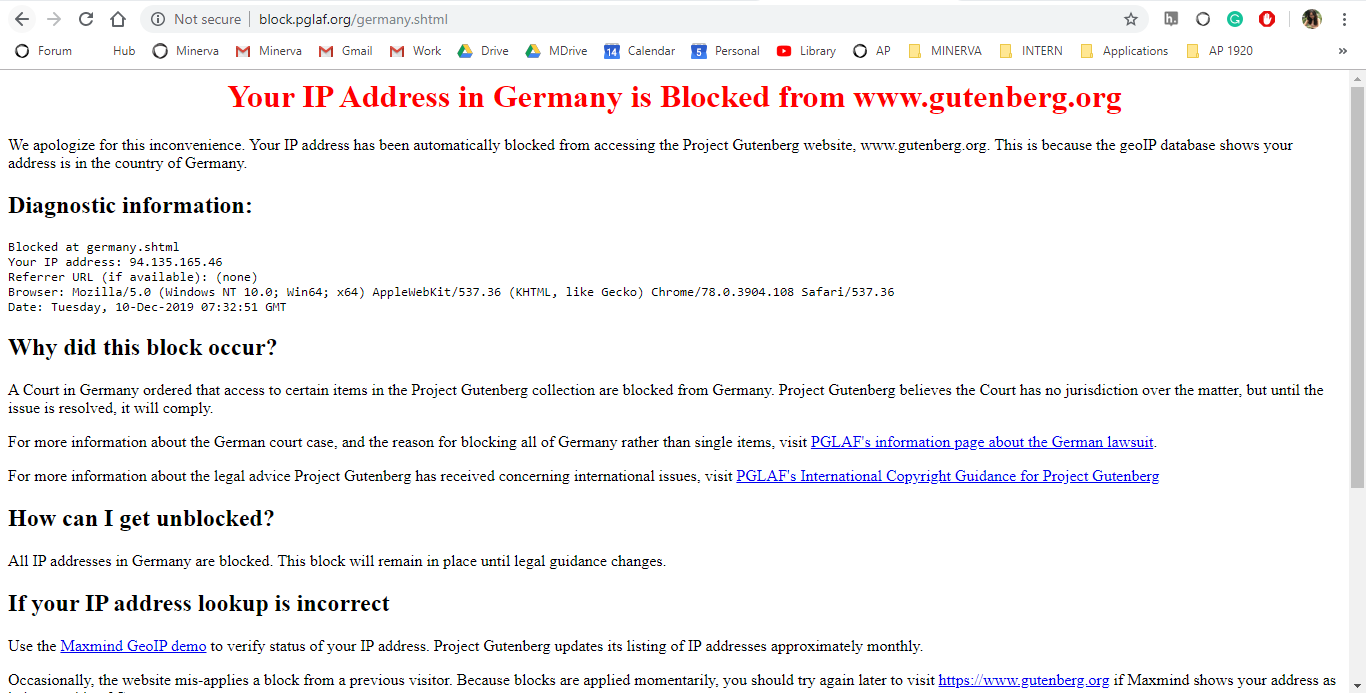

In [7]:
from IPython.display import Image
Image("preclass.png")

## Question 2. 
Now, as a bit of an interlude, we will get familiar with the `bitarray` Python library, which is helpful for completing this pre-class work. Go to this [link](https://pypi.org/project/bitarray/) and read the examples in the first three cell of section **Using the module**. Once you complete the reading task, please complete the function `get_bit_array` in the cell below.

In [ ]:
from bitarray import bitarray

class Node(object):
    """A node in a binary tree that represents a prefix code."""
    def __init__(self, freq, symb, parent = None, lchild = None, rchild = None):
        """
        - freq: float, frequency of the character
        - symb: string, a character in the file 
        - parent: a node, parent of the current node in the tree
        - lchild, rchild: left child node and right child node of the current node 
        in the tree.
        """
        self.freq = freq
        self.symb = symb
        self.parent = parent
        self.lchild = lchild
        self.rchild = rchild
    
    def __lt__(self, other):
        """
        nodeA < nodeB returns True if nodeA.freq < nodeB.freq. This enables
        us to use the module heapq on nodes. In other words, with this function,
        we can now push/insert a node into a heap as well as extract/pop the 
        minimum node from a heap. We studied the module heapq before. You can brush
        up your memory by visiting this link: 
        https://docs.python.org/3.0/library/heapq.html
        
        """
        return self.freq < other.freq
    
def get_bitarray(node):
    """
    Given a node in the tree, determines the corresponding codeword for character
    node.symb, using the rule in Cormen et al.: the binary codeword for a character 
    is the simple path from the root to that character, where 0 means “go to the 
    left child” and 1 means “go to the right child.
    
    Inputs:
    - node: a node, whose codeword represented by the tree is of interest
    
    Outputs:
    - a: a bit array that represents the codeword. For example, if the codeword is 
    01001, then a is bitarray('01001')
    
    """
    a = bitarray(node)
    for i in len(a):
        a[i] = parent
    raise NotImplementedError()

## Question 3. 
Complete the following function that builds a Huffman code, making use of `get_bitarray` and the module `heapq`. 

In [ ]:
import heapq
def encode(symb2freq):
    """
    Huffman encode the given dict mapping symbols to weights. 
    
    Inputs:
    - symb2freq: a dictionary that maps a symbol/character to
    the probability frequency in the text file. For example,
    {'a': .3, 'b':.6, 'c': .1}. This example symb2freq means 
    that symbol 'a' appears with frequency 30%, symbol 'b' 60%, 
    and symbol 'c' 10%.
    
    Outputs:
    - out: a dictionary that maps a symbol/charcater to a bitarray
    that represents the codeword for that symbol. For example,
    out = {'a': bitarray('01'), 'b': bitarray('11'), 'c': bitarray('101')}.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

# Question 4. 
Below you are given three functions to 1) build a frequency table for a file, 2) compress a file, and 3) decompress a file. Make use of these functions to do the following:

1. Create a compressed version of file `100.txt.utf-8.txt` that is named `100.txt.utf-8.txt.huff`.
2. Decompress `100.txt.utf-8.txt.huff` to file `100.txt.utf-8.txt.huff.dehuff.txt`. 

In [ ]:
from collections import defaultdict 
import pickle
# build a frequency table:
def build_freq(filename):
    freq = defaultdict(int)
    with open(filename, 'rb') as f:
        for line in f:
            for char in line:
                freq[char] += 1
    total = float(sum(freq.values()))
    return {char: count / total for (char, count) in freq.items()}

# Now compress the file:
def compress(filename, encoding, compressed_name=None):
    if compressed_name is None:
        compressed_name = filename + ".huff"
    output = bitarray()
    with open(filename, 'rb') as f:
        for line in f:
            for char in line:
                output.extend(encoding[char])
    N = len(output)
    with open(compressed_name, 'wb') as f:
        pickle.dump(N, f)
        pickle.dump(encoding, f)
        output.tofile(f)


# Now decompress the file:
def decompress(filename, decompressed_name=None):
    if decompressed_name is None:
        decompressed_name = filename + ".dehuff.txt"
    with open(filename, 'rb') as f:
        N = pickle.load(f)
        encoding = pickle.load(f)
        bits = bitarray()
        bits.fromfile(f)
        bits = bits[:N]

    # Totally cheating here and using a builtin method:
    output = bits.decode(encoding)
    with open(decompressed_name, 'wb') as f:
        f.write(bytes(output))
        
# YOUR CODE HERE
raise NotImplementedError()

## Question 5. 
Give your answer in the cell below:
1. Report the size of the compressed file and the decompressed file in the cell below.
2. How does the size of the decompressed file compare to the size of the original file (`100.txt.utf-8.txt`)?
3. Visually skim the decompressed file and the original file. Do they appear identical?

YOUR ANSWER HERE

## Question 6.
Compute and print out:
1. The percentage of 1’s in the compressed version
2. The percentage of 1’s in the uncompressed version

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()